In [100]:
from glob import glob
import pandas as pd
import numpy as np
from copy import deepcopy
import missingno as msno

In [101]:
from_dir = '/home/student/Data-analysis-and-presentation/HW1/data/test'
to_dir = 'test_data_with_na.pkl'
fill_na_series = True
fill_na_not_series = False
sepsis_dict = dict()
non_sepsis_dict = dict()

In [102]:
for file in glob(from_dir + '/patient_*.psv'):
    temp_df = pd.read_csv(file, sep='|')
    # get patient ID
    patient_ID = file[ file.find("_")+1 : file.find(".") ]

    if  temp_df.SepsisLabel.sum() > 0:
        first_sepsis_row = temp_df.shape[0] - temp_df.SepsisLabel.sum()
        sepsis_dict[patient_ID] = dict()
        sepsis_dict[patient_ID]['age'] = temp_df.loc[0, 'Age']
        sepsis_dict[patient_ID]['gender'] = temp_df.loc[0, 'Gender']
        sepsis_dict[patient_ID]['unit1'] = 1 if temp_df.loc[0, 'Unit1'] == 1 else 0
        sepsis_dict[patient_ID]['unit2'] = 1 if temp_df.loc[0, 'Unit2'] == 1 else 0
        sepsis_dict[patient_ID]['unknown unit'] = 0 if temp_df.loc[0, 'Unit1'] == 1 else 0 if temp_df.loc[0, 'Unit2'] == 1 else 1
        sepsis_dict[patient_ID]['HospAdmTime'] = temp_df.loc[0, 'HospAdmTime']

        sepsis_dict[patient_ID]['Final ICULOS'] = temp_df.loc[first_sepsis_row, 'ICULOS']

        sepsis_dict[patient_ID]['Not Null Percentages'] = temp_df.iloc[:first_sepsis_row, :].count() / temp_df.iloc[:first_sepsis_row, :].shape[0]
        sepsis_dict[patient_ID]['Means'] = temp_df.iloc[:first_sepsis_row, :].mean()[:-7]
        sepsis_dict[patient_ID]['Vars'] = temp_df.iloc[:first_sepsis_row, :].var()[:-7]

        if fill_na_series:
            sepsis_dict[patient_ID]['HR_series'] = temp_df.loc[:first_sepsis_row, 'HR'].interpolate(method='linear').fillna(method='bfill')
            sepsis_dict[patient_ID]['Resp_series'] = temp_df.loc[:first_sepsis_row, 'Resp'].interpolate(method='linear').fillna(method='bfill')
            sepsis_dict[patient_ID]['MAP_series'] = temp_df.loc[:first_sepsis_row, 'MAP'].interpolate(method='linear').fillna(method='bfill')
            sepsis_dict[patient_ID]['O2Sat_series'] = temp_df.loc[:first_sepsis_row, 'O2Sat'].interpolate(method='linear').fillna(method='bfill')
            sepsis_dict[patient_ID]['SBP_series'] = temp_df.loc[:first_sepsis_row, 'SBP'].interpolate(method='linear').fillna(method='bfill')
        else:
            sepsis_dict[patient_ID]['HR_series'] = temp_df.loc[:first_sepsis_row, 'HR']
            sepsis_dict[patient_ID]['Resp_series'] = temp_df.loc[:first_sepsis_row, 'Resp']
            sepsis_dict[patient_ID]['MAP_series'] = temp_df.loc[:first_sepsis_row, 'MAP']
            sepsis_dict[patient_ID]['O2Sat_series'] = temp_df.loc[:first_sepsis_row, 'O2Sat']
            sepsis_dict[patient_ID]['SBP_series'] = temp_df.loc[:first_sepsis_row, 'SBP']
    else:
        non_sepsis_dict[patient_ID] = dict()
        non_sepsis_dict[patient_ID]['age'] = temp_df.loc[0, 'Age']
        non_sepsis_dict[patient_ID]['gender'] = temp_df.loc[0, 'Gender']
        non_sepsis_dict[patient_ID]['unit1'] = 1 if temp_df.loc[0, 'Unit1'] == 1 else 0
        non_sepsis_dict[patient_ID]['unit2'] = 1 if temp_df.loc[0, 'Unit2'] == 1 else 0
        non_sepsis_dict[patient_ID]['unknown unit'] = 0 if temp_df.loc[0, 'Unit1'] == 1 else 0 if temp_df.loc[0, 'Unit2'] == 1 else 1
        non_sepsis_dict[patient_ID]['HospAdmTime'] = temp_df.loc[0, 'HospAdmTime']
        
        non_sepsis_dict[patient_ID]['Final ICULOS'] = temp_df.loc[temp_df.shape[0]-1, 'ICULOS']

        non_sepsis_dict[patient_ID]['Not Null Percentages'] = temp_df.count() / temp_df.shape[0]
        non_sepsis_dict[patient_ID]['Means'] = temp_df.mean()[:-7]
        non_sepsis_dict[patient_ID]['Vars'] = temp_df.var()[:-7]

        if fill_na_series:
            non_sepsis_dict[patient_ID]['HR_series'] = temp_df['HR'].interpolate(method='linear').fillna(method='bfill')
            non_sepsis_dict[patient_ID]['Resp_series'] = temp_df['Resp'].interpolate(method='linear').fillna(method='bfill')
            non_sepsis_dict[patient_ID]['MAP_series'] = temp_df['MAP'].interpolate(method='linear').fillna(method='bfill')
            non_sepsis_dict[patient_ID]['O2Sat_series'] = temp_df['O2Sat'].interpolate(method='linear').fillna(method='bfill')
            non_sepsis_dict[patient_ID]['SBP_series'] = temp_df['SBP'].interpolate(method='linear').fillna(method='bfill')
        else:
            non_sepsis_dict[patient_ID]['HR_series'] = temp_df['HR']
            non_sepsis_dict[patient_ID]['Resp_series'] = temp_df['Resp']
            non_sepsis_dict[patient_ID]['MAP_series'] = temp_df['MAP']
            non_sepsis_dict[patient_ID]['O2Sat_series'] = temp_df['O2Sat']
            non_sepsis_dict[patient_ID]['SBP_series'] = temp_df['SBP']

In [103]:
sepsis_df = pd.DataFrame.from_dict(data=sepsis_dict, orient='index')
sepsis_df['SepsisLabel'] = 1
non_sepsis_df = pd.DataFrame.from_dict(data=non_sepsis_dict, orient='index')
non_sepsis_df['SepsisLabel'] = 0
all_df = pd.concat([sepsis_df, non_sepsis_df])
# all_df.head()

In [104]:
final_df = deepcopy(all_df[['SepsisLabel','age', 'gender', 'unit1', 'unit2', 'unknown unit', 'HospAdmTime', 'Final ICULOS', 'HR_series', 'Resp_series', 'MAP_series', 'O2Sat_series', 'SBP_series']])

In [105]:
final_df['Temp_var'] = all_df['Vars'].apply(lambda x: x['Temp'])
final_df['Temp_mean'] = all_df['Means'].apply(lambda x: x['Temp'])
final_df['WBC_not_null'] = all_df['Not Null Percentages'].apply(lambda x: x['WBC'])
final_df['WBC_mean'] = all_df['Means'].apply(lambda x: x['WBC'])
final_df['Lactate_not_null'] = all_df['Not Null Percentages'].apply(lambda x: x['Lactate'])
final_df['BaseExcess_not_null'] = all_df['Not Null Percentages'].apply(lambda x: x['BaseExcess'])

if fill_na_not_series:
    final_df['Temp_var'] = final_df['Temp_var'].fillna(final_df['Temp_var'].median())
    final_df['Temp_mean'] = final_df['Temp_mean'].fillna(final_df['Temp_mean'].median())
    final_df['WBC_not_null'] = final_df['WBC_not_null'].fillna(final_df['WBC_not_null'].median())
    final_df['WBC_mean'] = final_df['WBC_mean'].fillna(final_df['WBC_mean'].median())
    final_df['Lactate_not_null'] = final_df['Lactate_not_null'].fillna(final_df['Lactate_not_null'].median())
    final_df['BaseExcess_not_null'] = final_df['BaseExcess_not_null'].fillna(final_df['BaseExcess_not_null'].median())
    

In [106]:
print(final_df.shape)
final_df.head()

(10000, 19)


,SepsisLabel,age,gender,unit1,unit2,unknown unit,HospAdmTime,Final ICULOS,HR_series,Resp_series,MAP_series,O2Sat_series,SBP_series,Temp_var,Temp_mean,WBC_not_null,WBC_mean,Lactate_not_null,BaseExcess_not_null
8390,1,73.00,1,1,0,0,-343.55,84,0 70.0 1 70.0 2 74.0 3 77.0 4 ...,0 9.0 1 9.0 2 11.0 3 12.0 4 ...,0 87.0 1 87.0 2 87.0 3 86.0 4 ...,0 100.0 1 100.0 2 99.0 3 100....,0 142.0 1 142.0 2 151.0 3 146....,0.244733,36.678261,0.144578,14.083333,0.000000,0.000000
1478,1,44.82,0,1,0,0,-12.06,127,0 103.0 1 103.0 2 99.0 3 ...,0 22.0 1 22.0 2 20.0 3 19....,0 82.0 1 82.0 2 79.0 3 81....,0 100.0 1 100.0 2 100.0 3 ...,0 105.0 1 105.0 2 104.0 3 ...,0.205446,37.242000,0.071429,17.888889,0.111111,0.214286
7600,1,55.00,1,0,0,1,-0.03,114,0 100.0 1 100.0 2 94.0 3 ...,0 15.0 1 15.0 2 15.0 3 15....,0 76.0 1 76.0 2 80.0 3 ...,0 100.0 1 100.0 2 100.0 3 ...,0 116.0 1 116.0 2 110.0 3 ...,0.836899,37.902326,0.053097,10.983333,0.000000,0.000000
3567,1,77.18,0,1,0,0,-5.46,48,0 123.0 1 123.0 2 133.0 3 104....,0 34.0 1 34.0 2 27.0 3 29.0 4 ...,0 99.0 1 99.0 2 118.0 3 76....,0 97.0 1 97.0 2 97.0 3 99....,0 163.0 1 163.0 2 163.0 3 163....,0.941863,37.190833,0.085106,8.500000,0.000000,0.127660
6481,1,40.00,1,1,0,0,-0.07,1,"0 NaN Name: HR, dtype: float64","0 NaN Name: Resp, dtype: float64","0 NaN Name: MAP, dtype: float64","0 NaN Name: O2Sat, dtype: float64","0 NaN Name: SBP, dtype: float64",NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

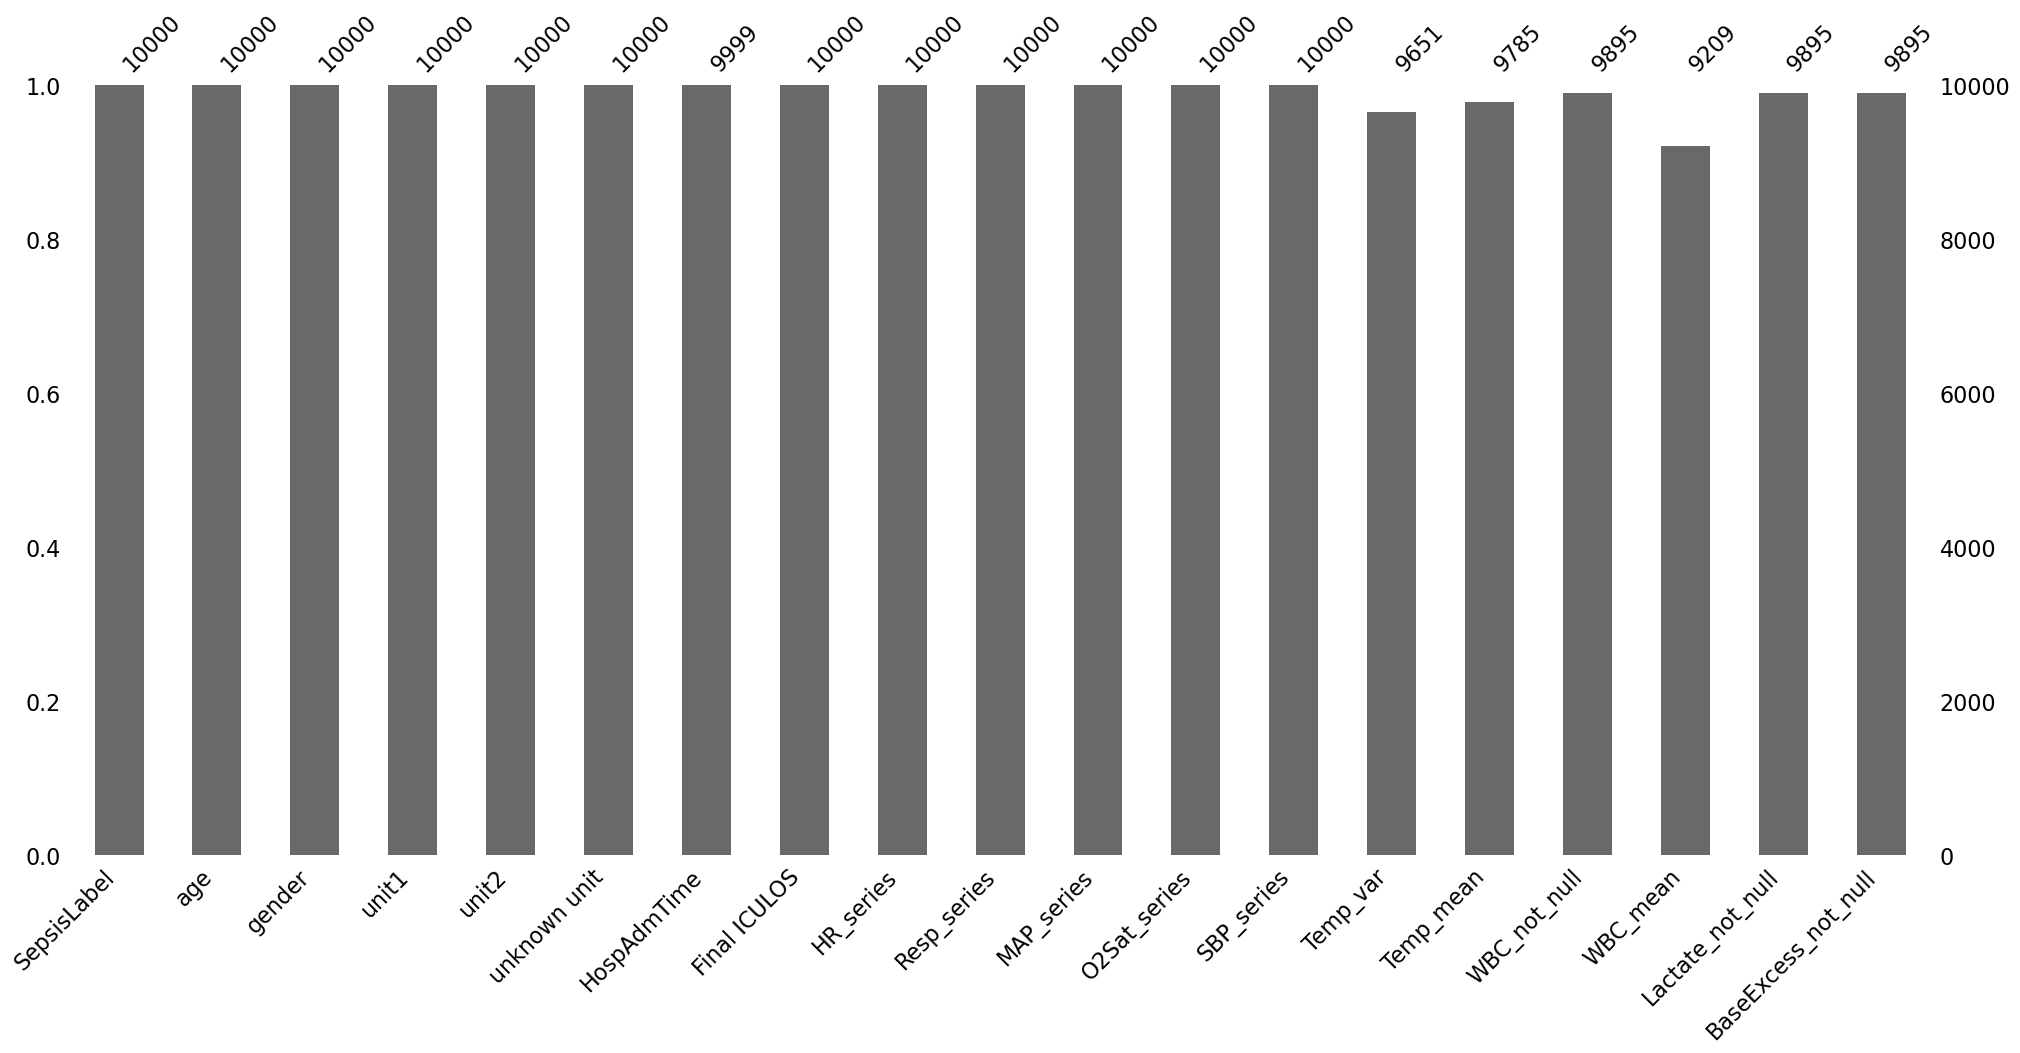

In [107]:
msno.bar(final_df)

In [108]:
final_df.to_pickle(to_dir)